In [1]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [2]:
outlook = 'overcast,overcast,overcast,overcast,rainy,rainy,rainy,rainy,rainy,sunny,sunny,sunny,sunny,sunny'.split(',')
temp = 'hot,cool,mild,hot,mild,cool,cool,mild,mild,hot,hot,mild,cool,mild'.split(',')
humidity = 'high,normal,high,normal,high,normal,normal,normal,high,high,high,high,normal,normal'.split(',')
windy = 'FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE'.split(',')
play = 'yes,yes,yes,yes,yes,yes,no,yes,no,no,no,no,yes,yes'.split(',')

In [3]:
dataset ={'outlook':outlook,'temp':temp,'humidity':humidity,'windy':windy,'play':play}
df = pd.DataFrame(dataset,columns=['outlook','temp','humidity','windy','play'])

In [4]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


In [5]:
##1. claculate entropy o the whole dataset

entropy_node = 0  #Initialize Entropy
values = df.play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.play.value_counts()[value]/len(df.play)  
    entropy_node += -fraction*np.log2(fraction)

In [6]:
entropy_node

0.9402859586706311

In [7]:
def ent(df,attribute):
    target_variables = df.play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Sweet')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.play ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'Sweet'
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste

    return(abs(entropy_attribute))

In [8]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'outlook': 0.6935361388961914,
 'temp': 0.9110633930116756,
 'humidity': 0.7884504573082889,
 'windy': 0.892158928262361}

In [9]:
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

In [10]:
#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}

In [11]:
IG

{'outlook': 0.24674981977443977,
 'temp': 0.029222565658955535,
 'humidity': 0.15183550136234225,
 'windy': 0.048127030408270155}

In [12]:
#import sys
#sys.setrecursionlimit(10**6)
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['play'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree
  
  

In [13]:
t = buildTree(df)

In [14]:
import pprint
pprint.pprint(t)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'FALSE': 'yes', 'TRUE': 'no'}},
             'sunny': {'humidity': {'high': 'no', 'normal': 'yes'}}}}


In [15]:
df

,outlook,temp,humidity,windy,play
0,overcast,hot,high,FALSE,yes
1,overcast,cool,normal,TRUE,yes
2,overcast,mild,high,TRUE,yes
3,overcast,hot,normal,FALSE,yes
4,rainy,mild,high,FALSE,yes
5,rainy,cool,normal,FALSE,yes
6,rainy,cool,normal,TRUE,no
7,rainy,mild,normal,FALSE,yes
8,rainy,mild,high,TRUE,no
9,sunny,hot,high,FALSE,no


In [16]:
df['outlook'] = df['outlook'].map({'overcast': 0, 'rainy': 1, 'sunny':2})

In [17]:
df['temp'] = df['temp'].map({'hot': 0, 'cool': 1, 'mild':2})

In [18]:
df['humidity'] = df['humidity'].map({'high': 0, 'normal': 1})

In [19]:
df['windy'] = df['windy'].map({'FALSE': 0, 'TRUE': 1})

In [20]:
df

,outlook,temp,humidity,windy,play
0,0,0,0,0,yes
1,0,1,1,1,yes
2,0,2,0,1,yes
3,0,0,1,0,yes
4,1,2,0,0,yes
5,1,1,1,0,yes
6,1,1,1,1,no
7,1,2,1,0,yes
8,1,2,0,1,no
9,2,0,0,0,no


In [21]:
X = df.drop('play', axis=1)
y = df['play']

In [23]:
X

,outlook,temp,humidity,windy
0,0,0,0,0
1,0,1,1,1
2,0,2,0,1
3,0,0,1,0
4,1,2,0,0
5,1,1,1,0
6,1,1,1,1
7,1,2,1,0
8,1,2,0,1
9,2,0,0,0


In [24]:
y

0     yes
1     yes
2     yes
3     yes
4     yes
5     yes
6      no
7     yes
8      no
9      no
10     no
11     no
12    yes
13    yes
Name: play, dtype: object

In [25]:
y.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
from sklearn import tree
model = tree.DecisionTreeClassifier() #criterion='entropy', max_depth=2

In [54]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [55]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.75

[Text(502.20000000000005, 339.75, 'humidity <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = no'),
 Text(334.8, 203.84999999999997, 'outlook <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = yes'),
 Text(167.4, 67.94999999999999, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = no'),
 Text(502.20000000000005, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = yes'),
 Text(669.6, 203.84999999999997, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = no')]

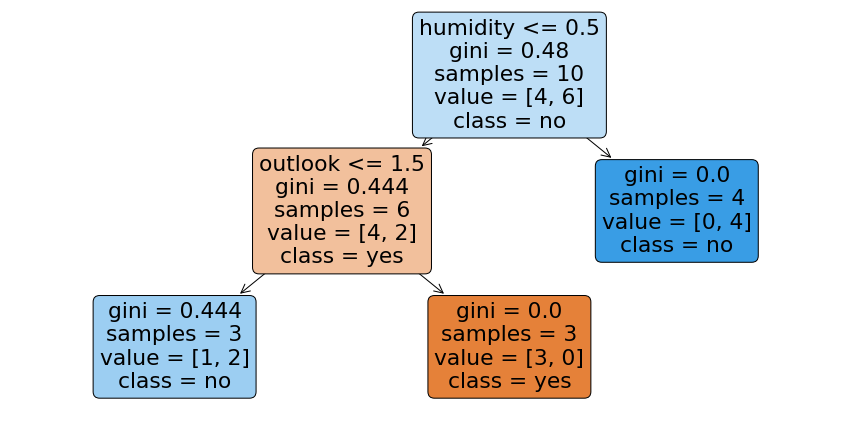

In [57]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model, 
          filled=True, 
          rounded=True, 
          class_names=["yes", "no"], 
          feature_names=X.columns) 